In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

from pmlb import fetch_data, classification_dataset_names
from scipy import stats

import random as rd
import math

import plotly

import warnings
warnings.filterwarnings('ignore')

import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [2]:
meta = np.load("meta.npy")
#num_precent,sample_num,feature_num,class_num,bin_multi,imbalance
bin_index = np.array(np.where(meta[:,4]==0)[0],dtype=np.int)
multi_index = np.where(meta[:,4]==1)[0]
bin_meta = meta[bin_index,:]
multi_meta = meta[multi_index,:]



nonsmall_index = np.array(np.where(meta[:,1]>300)[0])
nonsmall_meta = meta[nonsmall_index,:]


In [3]:
len(nonsmall_index)

121

In [4]:
bv3 = np.load("outbv3.npy")
bv4 = np.load("outbv4.npy")
bv5 = np.load("outbv5.npy")
bv6 = np.load("outbv6.npy")
bv7 = np.load("outbv7.npy")

In [5]:
standard = bv6[4]
standard.shape

(166, 3, 6)

In [6]:
standard_o = []
standard_d = []
standard_r = []
for i in range(0,166):
    standard_o.append(standard[i][0])
    standard_d.append(standard[i][1])
    standard_r.append(standard[i][2])
np_standard_o = np.array(standard_o)
np_standard_d = np.array(standard_d)
np_standard_r = np.array(standard_r)

pd_standard_o = pd.DataFrame(np_standard_o,columns=["bias","var","avr_train_err","std_train_err","avr_test_err","std_test_err"])
pd_standard_d = pd.DataFrame(np_standard_d,columns=["bias","var","avr_train_err","std_train_err","avr_test_err","std_test_err"])
pd_standard_r = pd.DataFrame(np_standard_r,columns=["bias","var","avr_train_err","std_train_err","avr_test_err","std_test_err"])
pd_standard_o.describe()

,bias,var,avr_train_err,std_train_err,avr_test_err,std_test_err
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,0.187242,0.192595,0.008044,0.003219,0.261850,0.046619
std,0.174600,0.130921,0.033727,0.007279,0.172084,0.040322
min,0.000000,0.007735,0.000000,0.000000,0.007955,0.000496
25%,0.045762,0.079006,0.000000,0.000000,0.103960,0.016858
50%,0.137682,0.185109,0.000000,0.000000,0.238276,0.036439
75%,0.274479,0.281969,0.001067,0.001755,0.394961,0.063339
max,1.000000,0.610250,0.244688,0.034434,0.815583,0.222881


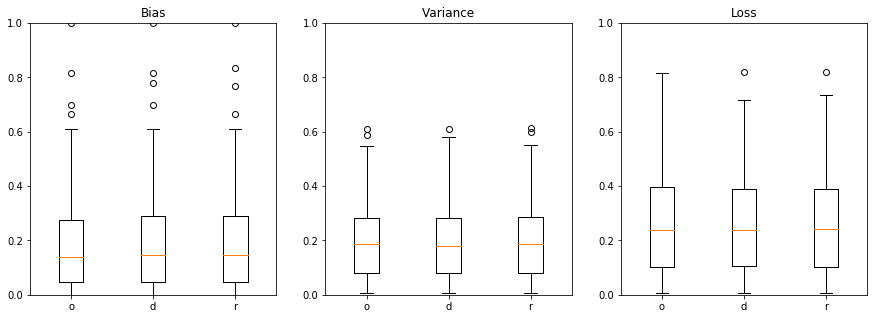

In [7]:
standard_odr_bias = np.transpose(np.array([standard_o,standard_d,standard_r])[:,:,0])
standard_odr_var = np.transpose(np.array([standard_o,standard_d,standard_r])[:,:,1])
standard_odr_loss = np.transpose(np.array([standard_o,standard_d,standard_r])[:,:,4])
plt.figure(figsize = (15,5))
plt.subplot(131)
plt.boxplot(standard_odr_bias,labels=["o","d","r"])
plt.ylim([0,1])
plt.title("Bias")
plt.subplot(132)
plt.boxplot(standard_odr_var,labels=["o","d","r"])
plt.ylim([0,1])
plt.title("Variance")
plt.subplot(133)
plt.boxplot(standard_odr_loss,labels=["o","d","r"])
plt.ylim([0,1])
plt.title("Loss")
plt.show()

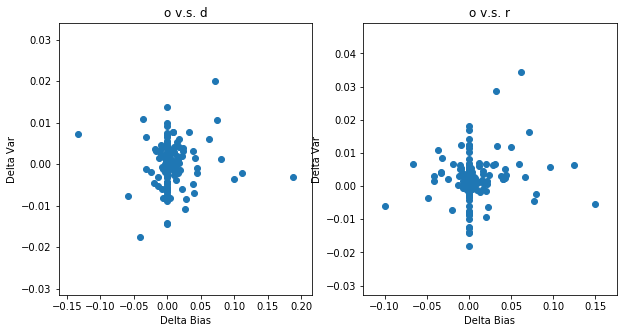

In [16]:
gap_od = np_standard_d - np_standard_o
gap_bias_od = gap_od[:,0]
gap_var_od = gap_od[:,1]
gap_loss_od = gap_od[:,4]

gap_or = np_standard_r - np_standard_o
gap_bias_or = gap_or[:,0]
gap_var_or = gap_or[:,1]
gap_loss_or = gap_or[:,4]


plt.figure(figsize=[10,5])
plt.subplot(121)
plt.scatter(gap_bias_od,gap_var_od)
plt.xlabel("Delta Bias")
plt.ylabel("Delta Var")
plt.title("o v.s. d")
plt.subplot(122)
plt.scatter(gap_bias_or,gap_var_or)
plt.xlabel("Delta Bias")
plt.ylabel("Delta Var")
plt.title("o v.s. r")
plt.savefig("pic1.4.2.jpg")
plt.show()

In [10]:
print(stats.ttest_ind(gap_bias_od,[0]*len(gap_bias_od)))
print(stats.ttest_ind(gap_var_od,[0]*len(gap_var_od)))
print(stats.ttest_ind(gap_loss_od,[0]*len(gap_loss_od)))


print(stats.ttest_ind(gap_bias_or,[0]*len(gap_bias_or)))
print(stats.ttest_ind(gap_var_or,[0]*len(gap_var_or)))
print(stats.ttest_ind(gap_loss_or,[0]*len(gap_loss_or)))

Ttest_indResult(statistic=2.444112330987659, pvalue=0.015043972660052633)
Ttest_indResult(statistic=-0.3584904411634111, pvalue=0.7202055448105136)
Ttest_indResult(statistic=0.14359155358460876, pvalue=0.885910653082862)
Ttest_indResult(statistic=2.7599283878926935, pvalue=0.006104332703746983)
Ttest_indResult(statistic=3.8880571487797018, pvalue=0.00012218441178917682)
Ttest_indResult(statistic=3.510097899681448, pvalue=0.0005101767697875869)


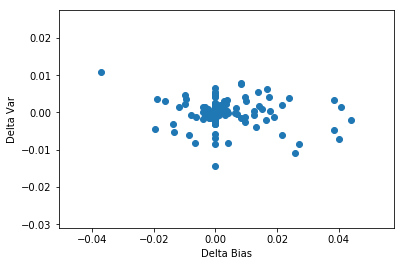

In [11]:
gap_od = gap_od[nonsmall_index,:]
gap_bias_od = gap_od[:,0]
gap_var_od = gap_od[:,1]
gap_loss_od = gap_od[:,4]

plt.scatter(gap_bias_od,gap_var_od)
plt.xlabel("Delta Bias")
plt.ylabel("Delta Var")
plt.show()

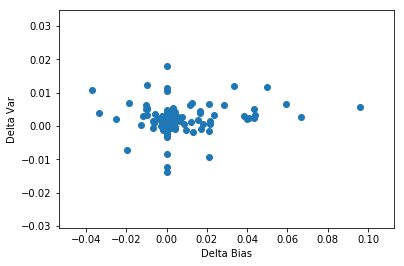

In [12]:
gap_or = gap_or[nonsmall_index,:]
gap_bias_or = gap_or[:,0]
gap_var_or = gap_or[:,1]
gap_loss_or = gap_or[:,4]

plt.scatter(gap_bias_or,gap_var_or)
plt.xlabel("Delta Bias")
plt.ylabel("Delta Var")
plt.show()

In [13]:
print(stats.ttest_ind(gap_bias_od,[0]*len(gap_bias_od)))
print(stats.ttest_ind(gap_var_od,[0]*len(gap_var_od)))
print(stats.ttest_ind(gap_loss_od,[0]*len(gap_loss_od)))


print(stats.ttest_ind(gap_bias_or,[0]*len(gap_bias_or)))
print(stats.ttest_ind(gap_var_or,[0]*len(gap_var_or)))
print(stats.ttest_ind(gap_loss_or,[0]*len(gap_loss_or)))

Ttest_indResult(statistic=2.9846647580336856, pvalue=0.003132346228211733)
Ttest_indResult(statistic=-0.3312439168034307, pvalue=0.7407492897213575)
Ttest_indResult(statistic=-0.26464822407070826, pvalue=0.7915076043601634)
Ttest_indResult(statistic=3.4223944860842854, pvalue=0.0007296184859265805)
Ttest_indResult(statistic=4.9520252432278795, pvalue=1.3854063752102442e-06)
Ttest_indResult(statistic=4.324606446181809, pvalue=2.2417190988192582e-05)
